<a href="https://colab.research.google.com/github/mohanrajmit/AGE_ESTIMATION/blob/master/rainstreaks_removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!git clone https://github.com/mohanrajmit/Rainstreaks_Removal.git

Cloning into 'Rainstreaks_Removal'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 40 (delta 5), reused 33 (delta 3), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [3]:
cd /content/Rainstreaks_Removal

/content/Rainstreaks_Removal


In [4]:
ls

car11.png        model/                     readme.txt  TrainData/
car8.jpg         rainstreaks_removal.ipynb  TestData/   training.py
GuidedFilter.py  README.md                  testing.py


In [5]:
import os
import numpy as np
import tensorflow as tf
import training as Network
import matplotlib.image as img
import matplotlib.pyplot as plt


In [6]:

os.environ['CUDA_VISIBLE_DEVICES'] = "0"  # select GPU device


In [9]:
file = "/content/car8.jpg"
ori = img.imread(file)
if np.max(ori) > 1:
   ori = ori/255.0

INFO:tensorflow:Restoring parameters from ./model/test-model/model
Loading pre-trained model


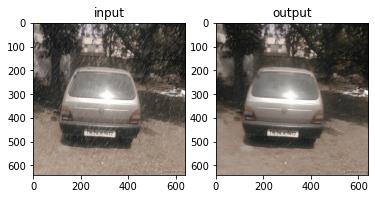

In [11]:


tf.reset_default_graph()
input_tensor = np.expand_dims(ori[:,:,:], axis = 0)

image = tf.placeholder(tf.float32, shape=(1, input_tensor.shape[1], input_tensor.shape[2], 3))
output = Network.inference(image, is_training = False)

saver = tf.train.Saver()
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True

with tf.Session(config=config) as sess: 
     if tf.train.get_checkpoint_state('./model/'):  
        ckpt = tf.train.latest_checkpoint('./model/')
        saver.restore(sess, ckpt)
        print ("Loading model")

     else:
        saver.restore(sess, "./model/test-model/model") # try a pre-trained model 
        print ("Loading pre-trained model")


     final_output  = sess.run(output, feed_dict={image: input_tensor})

     final_output[np.where(final_output < 0. )] = 0.
     final_output[np.where(final_output > 1. )] = 1.
    
     derained = final_output[0,:,:,:]
        
     plt.subplot(1,2,1)     
     plt.imshow(ori)      
     plt.title('input')

     plt.subplot(1,2,2)    
     plt.imshow(derained)
     plt.title('output')

     plt.show()